### Load libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set_style('darkgrid')

### Read the dataset

In [4]:
df = pd.read_csv("car data.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


**Car_Name** : This column should be filled with the name of the car.

**Year** : This column should be filled with the year in which the car was bought.

**Selling_Price** : This column should be filled with the price the owner wants to sell the car at.

**Present_Price** : This is the current ex-showroom price of the car.

**Kms_Driven** : This is the distance completed by the car in km.

**Fuel_Type**: Fuel type of the car i.e Diesel,Petrol,CNG

**Seller_Type**: Defines whether the seller is a dealer or an individual.

**Transmission** : Defines whether the car is manual or automatic.

**Owner** : Defines the number of owners the car has previously had.

In [5]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
df.shape

(301, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
Car_Name         301 non-null object
Year             301 non-null int64
Selling_Price    301 non-null float64
Present_Price    301 non-null float64
Kms_Driven       301 non-null int64
Fuel_Type        301 non-null object
Seller_Type      301 non-null object
Transmission     301 non-null object
Owner            301 non-null int64
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


### EDA

#### Checking null values

In [8]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

* There are no non null values present in the columns

#### Visualizing and Analyzing data

In [9]:
a=['Car_Name','Fuel_Type','Seller_Type','Transmission']

In [10]:
# Showing how many unique values are there in categorical columns
for i in a:
    print(i ,len(df[i].unique()))
    

Car_Name 98
Fuel_Type 3
Seller_Type 2
Transmission 2


In [11]:
# Since there are 98 unique different items in the column Car_Names we will drop that column.
df=df.drop('Car_Name',axis=1)

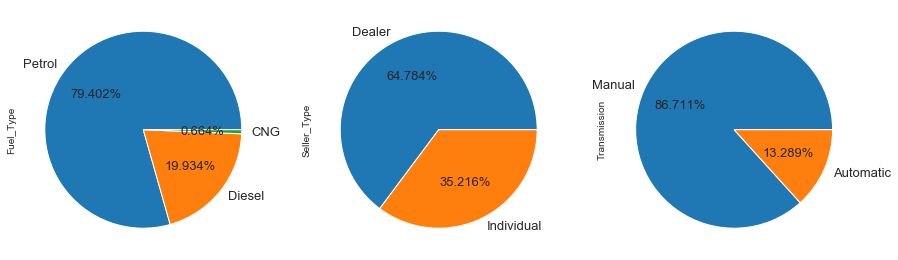

In [12]:
# Percentage of each category in Fuel_Type,Seller_Type,Transmission
fig, axes=plt.subplots(1,3,figsize=(15,10))
df['Fuel_Type'].value_counts().plot(kind='pie',autopct='%.3f%%',ax=axes[0],textprops={'fontsize': 13})
df['Seller_Type'].value_counts().plot(kind='pie',autopct='%.3f%%',ax=axes[1],textprops={'fontsize': 13})
df['Transmission'].value_counts().plot(kind='pie',autopct='%.3f%%',ax=axes[2],textprops={'fontsize': 13})
plt.show()

#### Inference:
    * The petrol cars grabs 79.4% market share which is much more than diesel and CNG cars.
    * The dealer selling cars (64.8% )are more than the individual selling cars.
    * Manual Transmission cars(86.7%) are more than automatic transmission cars.
    

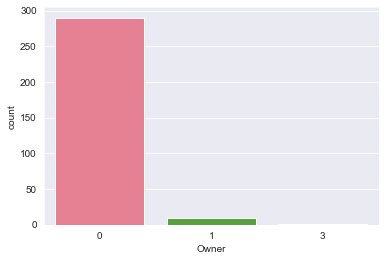

In [13]:
# Number of previous owners
sns.countplot(df['Owner'],palette='husl')
plt.show()

* Cars with no owner is much more than the cars having previous owner(s).

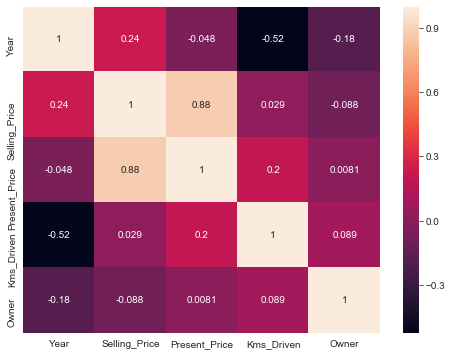

In [14]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)
top,bottom=plt.ylim()
plt.ylim(top+0.5,bottom-0.5)
plt.show()

* Selling price have a very high positive correlation with present price which implies that higher the present price higher the selling price.

In [15]:
df.info()
a=['Year','Selling_Price','Present_Price','Kms_Driven','Owner']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
Year             301 non-null int64
Selling_Price    301 non-null float64
Present_Price    301 non-null float64
Kms_Driven       301 non-null int64
Fuel_Type        301 non-null object
Seller_Type      301 non-null object
Transmission     301 non-null object
Owner            301 non-null int64
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


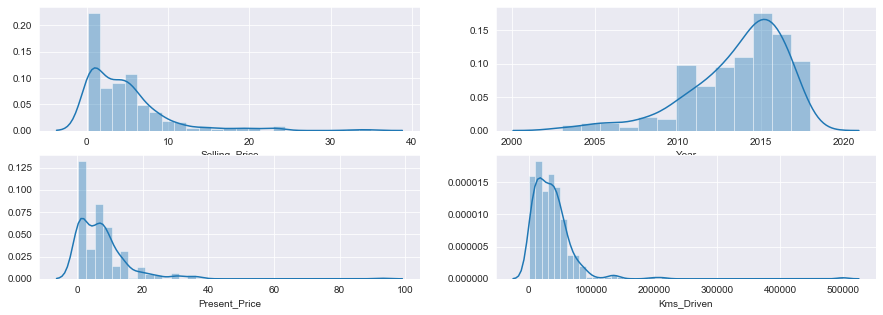

In [16]:
# Distribution of Selling_Price, Year, Present_Price, Kms_Driven
fig, axes=plt.subplots(2,2,figsize=(15,5))
sns.distplot(df['Selling_Price'],ax=axes[0,0])
sns.distplot(df['Year'],ax=axes[0,1])
sns.distplot(df['Present_Price'],ax=axes[1,0])
sns.distplot(df['Kms_Driven'],ax=axes[1,1])

plt.show()

#### Inference:
  * Majority of the selling price in low range except for few models.
  * Most of the cars are of the year 2010 - 2018.
  * The present price follows a similar trend as the selling price.
  * Most of the cars Kms driven lie below 100000.
        
    

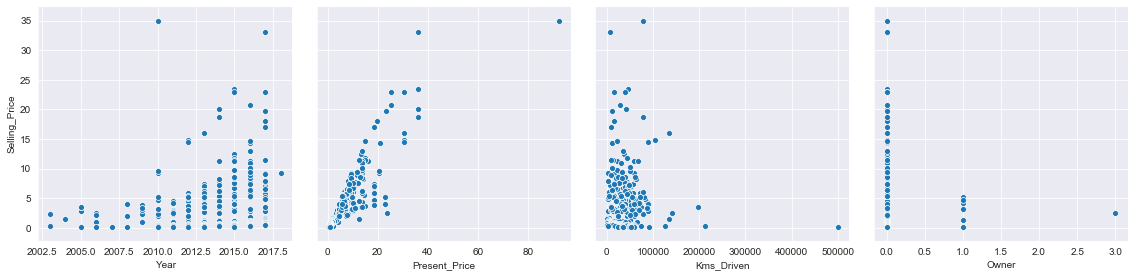

In [17]:
# Plotting 'Year', 'Present_Price', 'Kms_Driven', 'Owner' against the traget variable selling price to find their relation
sns.pairplot(df,x_vars=['Year', 'Present_Price', 'Kms_Driven', 'Owner'],y_vars=['Selling_Price'],height=4)
plt.show()

#### Inference:

* The newer models have higher selling price as compared to old models. 

* The present price and the selling price have a linear relationship, as the present price increases the selling price also increases.

* Selling price is a bit higher when the Kms driven are low.

* The cars with no owner have much higher selling price as compared with used cars.  

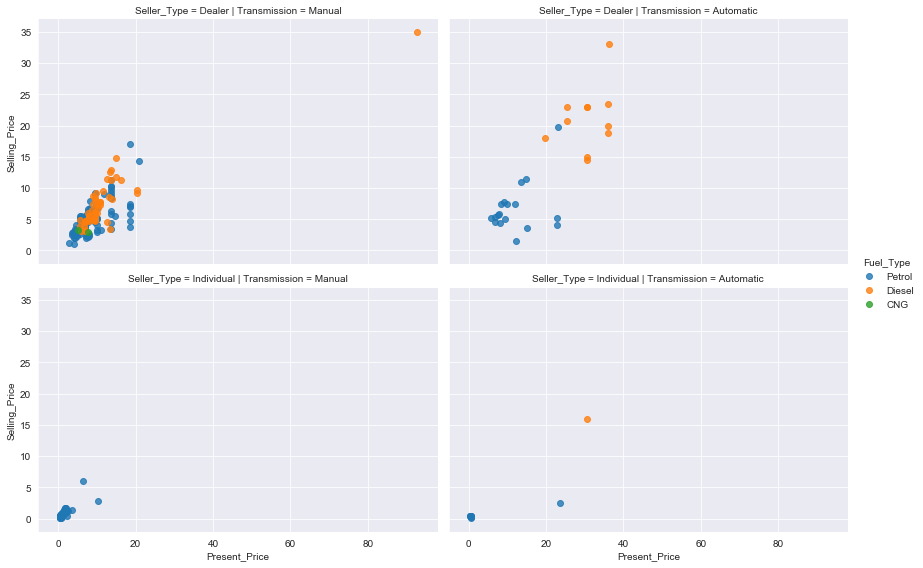

In [18]:
# To find further inference 
sns.lmplot(x='Present_Price',y='Selling_Price',data=df, fit_reg=False, col='Transmission',row='Seller_Type',hue='Fuel_Type',height=4,aspect=1.5)
plt.show()

#### Inference: 
   *  There is no CNG cars with automatic transmission.
   *  Cars with automatic transmission and with fuel type diesel have higher selling price.
   *  There are very few cars with with individual seller.
   

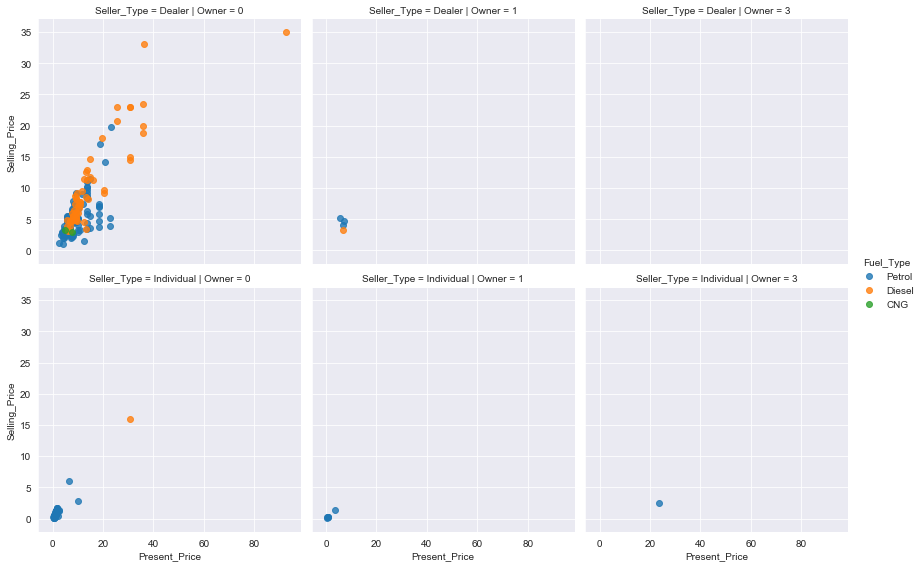

In [19]:
sns.lmplot(x='Present_Price',y='Selling_Price',data=df, fit_reg=False, col='Owner',row='Seller_Type',hue='Fuel_Type',height=4)
plt.show()

### Inference:
    * There is just one car with 3 owners.
    * Majority of the cars sold by dealers are cars with no previous owners.
    * Diesel cars with no owner sold by dealer have the highest price. 

### Outliers

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 8 columns):
Year             301 non-null int64
Selling_Price    301 non-null float64
Present_Price    301 non-null float64
Kms_Driven       301 non-null int64
Fuel_Type        301 non-null object
Seller_Type      301 non-null object
Transmission     301 non-null object
Owner            301 non-null int64
dtypes: float64(2), int64(3), object(3)
memory usage: 18.9+ KB


In [21]:
# Count of outliers in each numerical column
a=['Year','Selling_Price','Present_Price','Kms_Driven','Owner']

for i in a:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3-q1

    UL = q3 + (1.5 * iqr)
    LL = q1 - (1.5 * iqr)
    print(i,df[(df[i]>UL) | (df[i]<LL)].count()[i])
    #print(cars[(cars[i]>UL) | (cars[i]<LL)][i])


Year 7
Selling_Price 17
Present_Price 14
Kms_Driven 8
Owner 11


In [22]:
# Outliers of Selling price
q1 = df['Selling_Price'].quantile(0.25)
q3 = df['Selling_Price'].quantile(0.75)
iqr = q3-q1
UL = q3 + (1.5 * iqr)
LL = q1 - (1.5 * iqr)
df[(df['Selling_Price']>UL) | (df['Selling_Price']<LL)].sort_index()


,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
50,2012,14.90,30.61,104707,Diesel,Dealer,Automatic,0
51,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0
52,2017,18.00,19.77,15000,Diesel,Dealer,Automatic,0
53,2013,16.00,30.61,135000,Diesel,Individual,Automatic,0
59,2014,19.99,35.96,41000,Diesel,Dealer,Automatic,0
62,2014,18.75,35.96,78000,Diesel,Dealer,Automatic,0
63,2015,23.50,35.96,47000,Diesel,Dealer,Automatic,0
64,2017,33.00,36.23,6000,Diesel,Dealer,Automatic,0
66,2017,19.75,23.15,11000,Petrol,Dealer,Automatic,0
69,2016,14.25,20.91,12000,Petrol,Dealer,Manual,0


In [23]:
# Outliers of Present Price
q1 = df['Present_Price'].quantile(0.25)
q3 = df['Present_Price'].quantile(0.75)
iqr = q3-q1
UL = q3 + (1.5 * iqr)
LL = q1 - (1.5 * iqr)
df[(df['Present_Price']>UL) | (df['Present_Price']<LL)].sort_index()


,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
50,2012,14.90,30.61,104707,Diesel,Dealer,Automatic,0
51,2015,23.00,30.61,40000,Diesel,Dealer,Automatic,0
53,2013,16.00,30.61,135000,Diesel,Individual,Automatic,0
59,2014,19.99,35.96,41000,Diesel,Dealer,Automatic,0
62,2014,18.75,35.96,78000,Diesel,Dealer,Automatic,0
63,2015,23.50,35.96,47000,Diesel,Dealer,Automatic,0
64,2017,33.00,36.23,6000,Diesel,Dealer,Automatic,0
66,2017,19.75,23.15,11000,Petrol,Dealer,Automatic,0
79,2012,14.50,30.61,89000,Diesel,Dealer,Automatic,0
82,2017,23.00,25.39,15000,Diesel,Dealer,Automatic,0


* Note that Selling_Price and Present_Price have almost the same data points as the outliers which means that these outliers represents important information that are rare. Hence we cannot ignore or remove these outliers.


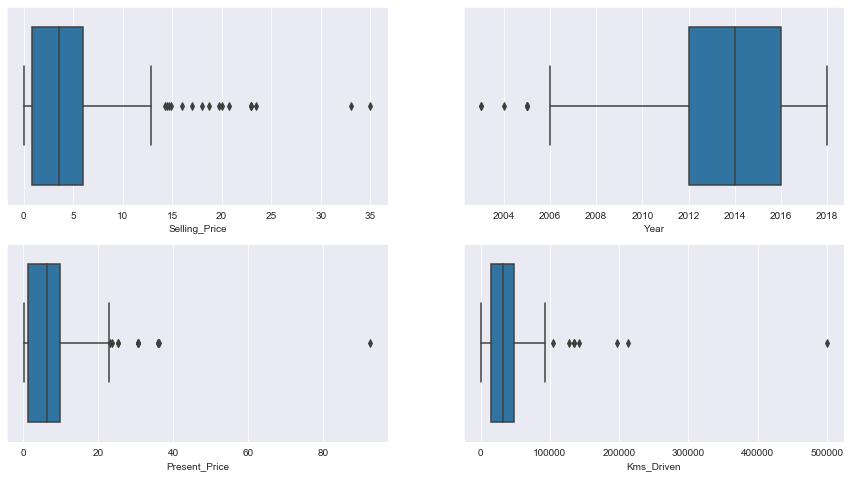

In [24]:
# Visual representation of outliers
fig, axes=plt.subplots(2,2,figsize=(15,8))
sns.boxplot('Selling_Price',data=df,ax=axes[0,0])
sns.boxplot('Year',data=df,ax=axes[0,1])
sns.boxplot('Present_Price',data=df,ax=axes[1,0])
sns.boxplot('Kms_Driven',data=df,ax=axes[1,1])
plt.show()


### Changing the categorical value to numerical

In [25]:
df=pd.get_dummies(df,drop_first=True)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
Year                      301 non-null int64
Selling_Price             301 non-null float64
Present_Price             301 non-null float64
Kms_Driven                301 non-null int64
Owner                     301 non-null int64
Fuel_Type_Diesel          301 non-null uint8
Fuel_Type_Petrol          301 non-null uint8
Seller_Type_Individual    301 non-null uint8
Transmission_Manual       301 non-null uint8
dtypes: float64(2), int64(3), uint8(4)
memory usage: 13.1 KB


### Model building 

* The dependent variable will be 'Selling_price' rest all the variables will be cosidered as independent variables.

In [28]:
df=pd.get_dummies(df,drop_first=True)
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,0,1,0,1
1,2013,4.75,9.54,43000,0,1,0,0,1
2,2017,7.25,9.85,6900,0,0,1,0,1
3,2011,2.85,4.15,5200,0,0,1,0,1
4,2014,4.60,6.87,42450,0,1,0,0,1


In [29]:
X=df.drop('Selling_Price',axis=1)
y=df['Selling_Price']
X.head()

,Year,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,2014,5.59,27000,0,0,1,0,1
1,2013,9.54,43000,0,1,0,0,1
2,2017,9.85,6900,0,0,1,0,1
3,2011,4.15,5200,0,0,1,0,1
4,2014,6.87,42450,0,1,0,0,1


### 1. Linear Regression

In [46]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_std = ss.fit_transform(X)
X_std=pd.DataFrame(X_std, columns=X.columns)

In [47]:
import statsmodels.api as sm
Xc=sm.add_constant(X_std)
ols=sm.OLS(y,Xc)
model=ols.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Selling_Price   R-squared:                       0.883
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     274.3
Date:                Mon, 10 Aug 2020   Prob (F-statistic):          5.71e-131
Time:                        17:30:18   Log-Likelihood:                -593.62
No. Observations:                 301   AIC:                             1205.
Df Residuals:                     292   BIC:                             1239.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      4.6613      0.102     45.807      0.000       4.461       4.862
Year                       1.1347      0.124      9.159      0.000       0.891       1.379
Present_Price              3.7727      0.138     27.355      0.000       3.501       4.044
Kms_Driven                -0.2723      0.125     -2.172      0.031      -0.519      -0.026
Owner                     -0.1669      0.105     -1.595      0.112      -0.373       0.039
Fuel_Type_Diesel           0.9867      0.511      1.932      0.054      -0.018       1.992
Fuel_Type_Petrol           0.2457      0.509      0.483      0.630      -0.756       1.248
Seller_Type_Individual    -0.5356      0.123     -4.371      0.000      -0.777      -0.294
Transmission_Manual       -0.4916      0.111     -4.417      0.000      -0.711      -0.273
==============================================================================
Omnibus:                       95.107   Durbin-Watson:                   1.795
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              696.392
Skew:                           1.075   Prob(JB):                    6.03e-152
Kurtosis:                      10.135   Cond. No.                         11.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Inference: 

* R2= 0.883 implier that 88.3 % of the variation in selling price is explained by the independent variables.

* Probability of F-stats = 0 implies that atleast one of the features plays a  significant role in predicting selling price.

* From the Pvalues we can also say that except Fuel type and owner all the other variables plays a significant role in predicting the model.


In [48]:
y_pred=model.predict(Xc)

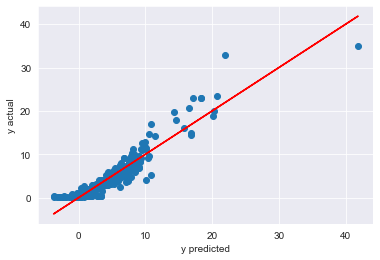

In [49]:
# Plotting predicted values vs actual values
plt.scatter(y_pred,y)
plt.plot(y_pred,y_pred,'r')
plt.xlabel('y predicted')
plt.ylabel('y actual')
plt.show()

### Checking assumptions

#### 1. Multicollinearity

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(X_std.values,i) for i in range(X_std.shape[1])]
vif['feature']=X_std.columns
vif.sort_values('VIF',ascending=False)

,VIF,feature
4,25.182719,Fuel_Type_Diesel
5,25.026007,Fuel_Type_Petrol
1,1.836927,Present_Price
2,1.517916,Kms_Driven
0,1.482347,Year
6,1.449644,Seller_Type_Individual
7,1.196263,Transmission_Manual
3,1.056734,Owner


There is high vif values for few features. To remove multicollinearity we can remove features one by one till all the vif values lie below 10.


In [51]:
X_vif=X_std.copy()
while vif['VIF'].max()>10:
    a=vif[vif['VIF']==vif['VIF'].max()].iloc[0,1]
    X_vif=X_vif.drop(a,axis=1)
    
    vif=pd.DataFrame()
    vif['VIF']=[variance_inflation_factor(X_vif.values,i) for i in range(X_vif.shape[1])]
    vif['feature']=X_vif.columns
vif

# We can see that one columns have been removed which brings all the vif values below 10.

,VIF,feature
0,1.479069,Year
1,1.817777,Present_Price
2,1.516875,Kms_Driven
3,1.056732,Owner
4,1.364677,Fuel_Type_Petrol
5,1.445964,Seller_Type_Individual
6,1.196257,Transmission_Manual


### 2.Linearity

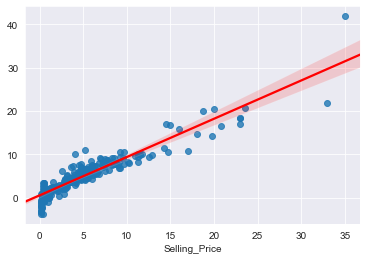

In [52]:
sns.regplot(y,model.predict(),line_kws={'color':'red'})
plt.show()

It shows a linear trend but to confirm we further check using rainbow test.

In [53]:
from statsmodels.stats.diagnostic import linear_rainbow
linear_rainbow(res=model,frac=0.5) 
# Since pvalue > 0.05 we conclude that the data is  linear.

(1.1839647705253034, 0.15467911037198134)

#### 3. Normality

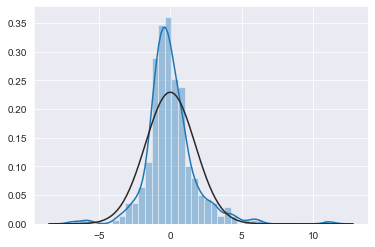

In [54]:
from scipy.stats import norm
sns.distplot(model.resid,fit=norm)
norm.fit(model.resid)
plt.show()

* The light blue is the actual distribution of residuals and the dark line, if the residual is perfectly normal.  
* The graph shows that the residuals does not follow a normal curve. 
* We can do transformations to make it normal.

In [55]:
import scipy.stats as stats
stats.shapiro(model.resid)
# p value = 0 < 0.05 hence we reject null hypothesis (ie.It is normally distributed) Which means that it is not normally distributed.

(0.8971607685089111, 2.0206836963236607e-13)

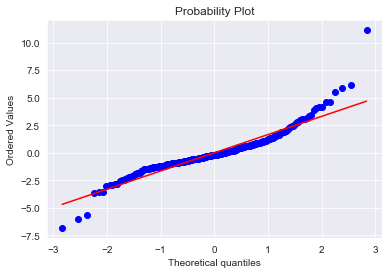

In [56]:
#### QQ plot ( quantile quantile plot)

import scipy.stats as stats
stats.probplot(model.resid,plot=plt)
plt.show()

# here only the extreme values are going from normality.

#### 4. Autocorelation
  
From the model Durbin-watson = 1.795 its very close to 2. Hence we can say that there is very low/ negligible autocorelation. 

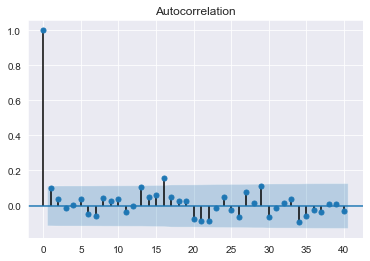

In [57]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf(model.resid, lags=40 , alpha=0.05)
acf.show()


ACF: The correlation between the observation at the current time spot and the observations at previous time spots
    
The blue shade is the threshold, autocorrelation is large for lag 0 and for others it is less.
    

#### 5. Homoscadacity : test of variance

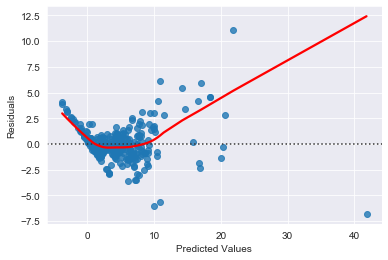

In [58]:
sns.residplot(model.predict(Xc),model.resid,lowess =True, line_kws ={'color':'red'} )
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()
# from the graph it is hetro ( since there is high varience in the output )
# we can further check using 

In [59]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name=['F-stat','p=value']
test=sms.het_goldfeldquandt(y=model.resid,x=Xc)
lzip(name, test)

[('F-stat', 0.24301816685134223), ('p=value', 0.9999999999999997)]

H0: Residuals got constant variance

H1: Residuals varience is not constant

Since p-value > 0.05.  We fail to reject the null hypothesis and conclude that variance of residuals is constant. Hence hetroscadastic is not present.


### Basic Model

In [90]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std,y,test_size=0.3,random_state=0)

In [91]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error
print('R^2 on the test data', r2_score(y_test, y_pred))


R^2 on the test data -4.45215756712333e+25


### Regularisation

### Lasso 

In [92]:
from sklearn.linear_model import Lasso, Ridge

In [93]:
lasso=Lasso(alpha=0.01)
lasso.fit(X_train,y_train)

Lasso(alpha=0.01)

In [94]:
pd.DataFrame(lasso.coef_,index=X_train.columns,columns=['coefs'])

,coefs
Year,1.682720
Present_Price,3.838394
Kms_Driven,-0.073899
Owner,0.000000
Car_Name_Activa 3g,0.060332
...,...
Car_Name_xcent,-0.020666
Fuel_Type_Diesel,0.520638
Fuel_Type_Petrol,0.191822
Seller_Type_Individual,-0.587241


In [95]:
y_pred = lasso.predict(X_test)

In [96]:
from sklearn.metrics import r2_score

In [97]:
r2_score(y_test,y_pred)

0.8863193980235506

### Ridge

In [98]:
ridge=Ridge(alpha=0.01)
ridge.fit(X_train,y_train)

Ridge(alpha=0.01)

In [99]:
pd.DataFrame(ridge.coef_,index=X_train.columns,columns=['coefs'])

,coefs
Year,1.844904
Present_Price,3.813975
Kms_Driven,-0.041910
Owner,0.195710
Car_Name_Activa 3g,0.043185
...,...
Car_Name_xcent,-0.077595
Fuel_Type_Diesel,1.033772
Fuel_Type_Petrol,0.752663
Seller_Type_Individual,-0.660636


In [100]:
y_pred = ridge.predict(X_test)

In [101]:
from sklearn.metrics import r2_score

In [102]:
r2_score(y_test,y_pred)

0.8787923776490257

In [103]:
#### There is no much difference in the score. This is because lasso and ridge needs many columns to make a difference in the prediction. Hence we try using all the columns
cars = pd.read_csv("car data.csv")

In [104]:
cars=pd.get_dummies(cars,drop_first=True)

In [105]:
X=cars.drop('Selling_Price',axis=1)
y=cars['Selling_Price']

In [106]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_std = ss.fit_transform(X)
X_std=pd.DataFrame(X_std, columns=X.columns)

In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std,y,test_size=0.3,random_state=0)

In [108]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score


lasso=Lasso(alpha=0.01)
lasso.fit(X_train,y_train)

pd.DataFrame(lasso.coef_,index=X_train.columns,columns=['coefs'])

y_pred = lasso.predict(X_test)
r2_score(y_test,y_pred)

0.8863193980235506

In [109]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score


ridge=Ridge(alpha=0.01)
ridge.fit(X_train,y_train)

pd.DataFrame(ridge.coef_,index=X_train.columns,columns=['coefs'])

y_pred = ridge.predict(X_test)
r2_score(y_test,y_pred)

0.8787923776490257

In [ ]:
# In lasso the scores have improved to 0.88 as compared to basic model with score 0.85

#### We will use some other model and compare the results

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor

In [125]:
models = {'Lasso': Lasso(alpha=0.01),
          'Ridge':Ridge(alpha=0.01),
          'RandomForest' : RandomForestRegressor(),
          'DecisionTree' : DecisionTreeRegressor(),
          'GradientBoosting' : GradientBoostingRegressor(),
          'AdaBoost' : AdaBoostRegressor()}


def Different_model_scores(models):
    model_scores = {}    
    for name, model in models.items():        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        model_scores[name]=r2_score(y_test,y_pred)
    return model_scores
model_scores = Different_model_scores(models)
model_scores

{'Lasso': 0.8863193980235506,
 'Ridge': 0.8787923776490257,
 'RandomForest': 0.9044464678623891,
 'DecisionTree': 0.8947953561827815,
 'GradientBoosting': 0.9233358596248231,
 'AdaBoost': 0.8814260024763488}

* It can be observed that the best model is when gradient boosting is used with a R2 score of 0.90